#Dataset Description:
This dataset contains detailed statistics for football players in the English Premier League. Each row represents a single player and includes information such as their name, team, playing position, nationality, number of goals scored, total shots taken, and assists made.

#Univariate Questions

1-What is the total number of goals in the dataset?

2-What is the distribution of players by position?

3-What is the average number of shots per player?

4-What are the top 10 players with the highest number of goals?

5-How many players are in each team?

#Bivariate Questions

6-What are the top 10 Clubs with the highest number of goals?

7-What is the distribution of goals by position ?

8-What is the correlation between number of shots and goals scored ?

# Multivariate Questions
9-Who are the top 'English' 'forwards' in terms of total goal contributions ('goals' + 'assists') ?

10-Who are the top 'English' 'goalkaper' in terms of total 'Saves' & 'Clean Sheets' ?


#**import libraries & data**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv('data.csv')

#**filtering the data**
##use only columns we nead

In [ ]:
colum_neaded=data[['Player Name','Club','Nationality','Position','Goals','Assists','Shots','Clean Sheets','Saves']].copy()
print(colum_neaded.head())

     Player Name     Club Nationality Position  Goals  Assists  Shots  \
0      Ben White  Arsenal     England      DEF      0        2      9   
1    Bukayo Saka  Arsenal     England      MID      6       10     67   
2     David Raya  Arsenal       Spain      GKP      0        0      0   
3    Declan Rice  Arsenal     England      MID      4        7     48   
4  Ethan Nwaneri  Arsenal     England      MID      4        0     24   

   Clean Sheets  Saves  
0             5      0  
1             2      0  
2            13     86  
3             7      0  
4             1      0  


#**Univariate Questions**

##1-What is the total number of goals in this season?

In [ ]:
print(" in the dataset total number of "+str(colum_neaded[['Goals']].sum()))

 in the dataset total number of Goals    963
dtype: int64


##2-What is the distribution of players by position?

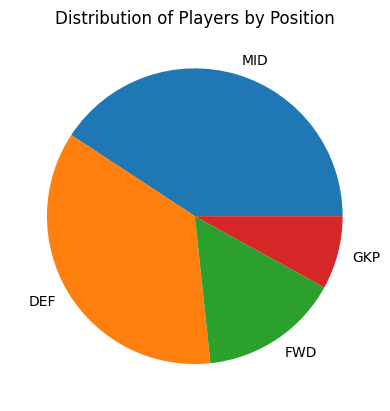

In [ ]:
data_position =  colum_neaded['Position'].value_counts()
plt.pie(data_position,labels=data_position.index)
plt.title('Distribution of Players by Position')
plt.show()

##3-What is the average number of shots per player?

In [ ]:
print("the average number of shots per player:"+str(colum_neaded[['Shots']].mean()))

the average number of shots per player:Shots    17.52669
dtype: float64



##4-What are the top 10 players with the highest number of goals?

In [ ]:
top_10_scorers = colum_neaded[['Player Name', 'Goals']].sort_values(by='Goals', ascending=False).head(10)
print(top_10_scorers)

              Player Name  Goals
324         Mohamed Salah     29
391        Alexander Isak     23
335        Erling Haaland     22
82           Bryan Mbeumo     20
417            Chris Wood     20
107           Yoane Wissa     19
46          Ollie Watkins     16
548         Matheus Cunha     15
141           Cole Palmer     15
180  Jean-Philippe Mateta     14


##5-How many players are in each team?

<Axes: title={'center': 'Total Players in Each Team'}, xlabel='Club'>

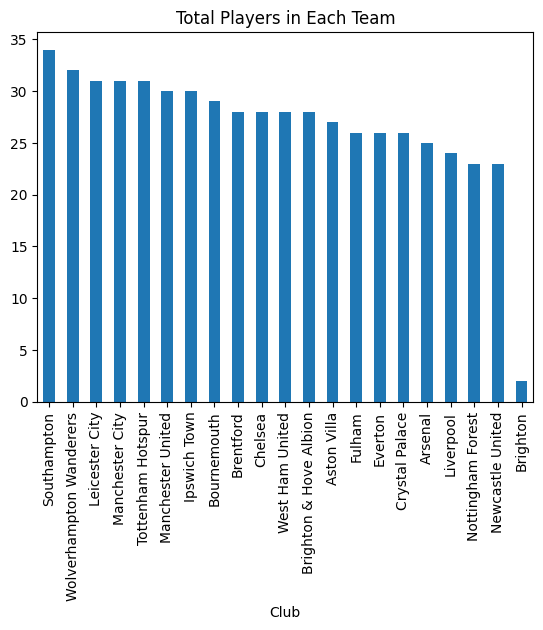

In [ ]:

players_per_team = colum_neaded['Club'].value_counts().sort_values(ascending=False)
players_per_team.plot(kind='bar', title='Total Players in Each Team')


#**Bivariate Questions**


##6-What are the top 10 Clubs with the highest number of goals?

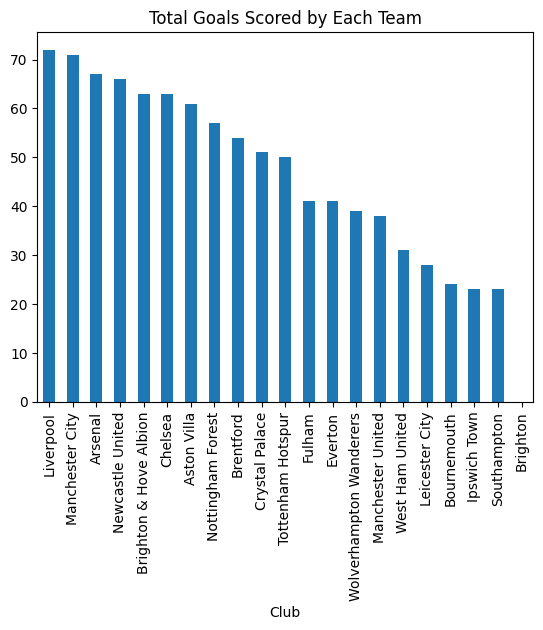

In [ ]:

goals_team = colum_neaded.groupby('Club')['Goals'].sum()
goals_team = goals_team.sort_values(ascending=False)
goals_team.plot(kind= 'bar',title='Total Goals Scored by Each Team')
plt.show()


##7-What is the distribution of goals by position ?

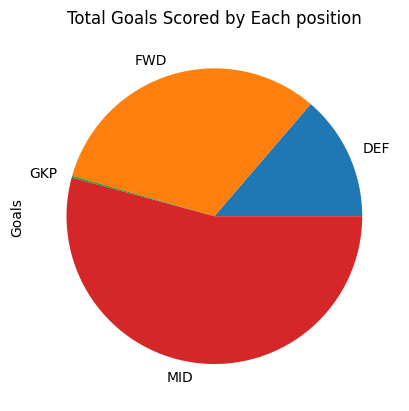

In [ ]:
goals_position = colum_neaded.groupby('Position')['Goals'].sum()
goals_position.plot(kind= 'pie',title='Total Goals Scored by Each position')
plt.show()


##8-What is the correlation between number of shots and goals scored ?

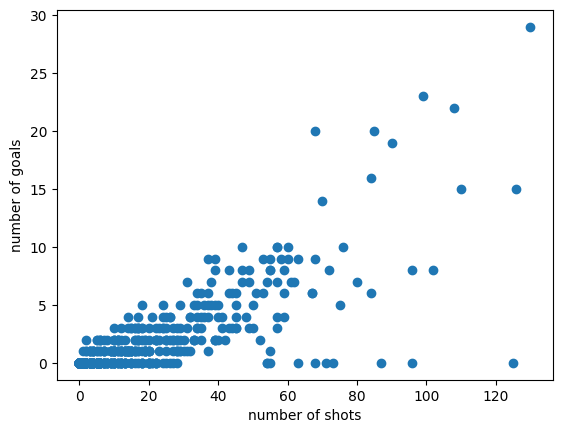

In [ ]:

shots_no = colum_neaded[['Shots']]
goals_no =  colum_neaded[['Goals']]
plt.scatter(shots_no,goals_no,marker='o')
plt.xlabel("number of shots")
plt.ylabel("number of goals")
plt.show()


#**Multivariate Questions**



##9-Who are the top 'English' 'forwards' in terms of total goal contributions ('goals' + 'assists') ?

In [ ]:
english_forwards = colum_neaded[(colum_neaded['Nationality'] == 'England') & (colum_neaded['Position'] == 'FWD')]
total_goal_contributions = english_forwards.groupby('Player Name')[['Goals', 'Assists']].sum()
total_goal_contributions['Total'] = total_goal_contributions['Goals'] + total_goal_contributions['Assists']
top_forwards = total_goal_contributions.sort_values(by='Total', ascending=False).head(10)
print(top_forwards)


                       Goals  Assists  Total
Player Name                                 
Ollie Watkins             16        8     24
Dominic Solanke            9        3     12
Danny Welbeck             10        0     10
Jamie Vardy                9        0      9
Jack Clarke                0        4      4
Dominic Calvert-Lewin      3        1      4
Adam Armstrong             2        2      4
Danny Ings                 1        2      3
Eddie Nketiah              3        0      3
Tyler Dibling              2        0      2


##10-Who are the top 'English' 'goalkaper' in terms of total 'Saves' & 'Clean Sheets' ?

In [ ]:



english_Goalkaper = colum_neaded[(colum_neaded['Nationality'] == 'England') & (colum_neaded['Position'] == 'GKP')]
saves = english_Goalkaper.groupby('Player Name')[['Saves', 'Clean Sheets']].sum()
top_Goalkaper = saves.sort_values(by='Clean Sheets', ascending=False).head(10)
print(top_Goalkaper)



                  Saves  Clean Sheets
Player Name                          
Jordan Pickford     122            12
Dean Henderson      104            11
Nick Pope            88             8
Aaron Ramsdale      125             3
Dan Bentley           8             1
Jason Steele          3             1
Fraser Forster       29             1
Christian Walton     20             1
Brandon Austin        2             0
Alex McCarthy        24             0
